**Plotting Expected Transits by Multiplicity**

This code plots the expected number of transits by multiplicity (how many planets seen transiting) for the entire synthetic population of exoplanets, and then compares the results to Kepler's observed transits by mulitplicity. The plot draws from data in the `avg_prob_values_adjusted.csv` file.

In [7]:
from generate_lib import *

In [8]:
### GLOBAL FLAGS ###
# SHOW_PLOT: Whether to show the plots.
# SAVE_PLOT: Whether to save the generated plot as a separate file.
# PLOT_ALL: Whether to plot all available data (i.e. even from systems which did not integrate to 1 Myr).
# KEPLER_LABELS: Whether to displace the number of Kepler transits on the plot for each Kepler tick mark.
# VERBOSE: Whether to output the mean transit values from the synthetic data.
####################
SHOW_PLOT = True
SAVE_PLOT = True
PLOT_ALL = False
KEPLER_LABELS = False
VERBOSE = True

In [9]:
def get_col(head, header):
    '''This method gets the column index of a .csv file given a specified head and header list.
    
    Params:
    - Head: The specific head to use from the header.
    - Header: A list of heads.
    '''

    return header.index(head)

def plot_data():
    '''This method plots the data. No parameters required.'''

    filename = 'avg_prob_values'

    if PLOT_ALL:
        filename += '_all'

    filepath = os.path.join(os.pardir, os.pardir, 'data', 'processed', 'multiplicities', filename + '.csv')

    (header, data) = csv_2_data(filepath)

    aligned_data = list()
    random_data = list()
    multiplicities = list()
    xlabels = list()

    for head in header:
        if '(Aligned Omega)' in head:
            aligned_data.append(data[get_col(head, header)])
        elif '(Random Omega)' in head:
            n = head.split(' ')[0]

            multiplicities.append(int(n))
            xlabels.append(n + ' Planets')

            random_data.append(data[get_col(head, header)])

    # OG: 86760
    # To match 3-planet probs:
    NUM_PLANETS = 14288

    aligned_data = NUM_PLANETS * np.array(aligned_data).astype(float)
    random_data = NUM_PLANETS * np.array(random_data).astype(float)

    num_ticks = len(xlabels) + 2

    (fig, axes) = plt.subplots(2, 2, sharex = True, sharey = False)
    fig.set_size_inches(8.0, 8.0)

    xmin = multiplicities[0]

    assert xmin == np.min(multiplicities)

    xloc = np.arange(len(multiplicities)) + xmin

    plot_types = ['linear', 'log']

    # Number of observed transits by Kepler, from 1-planet transits to 6-planet transits.
    kepler_nums = [1171, 253, 100, 28, 6, 3]

    for plot_type in plot_types:
        offset = plot_types.index(plot_type) * 2
        
        plt.subplot(2, 2, 1 + offset)

        # Adds the labels.
        if plot_type == 'log':
            plt.plot([], [], color='red', label = 'Aligned $\Omega$')
            plt.plot([], [], color='blue', label = 'Random $\Omega$')
            plt.plot([], [], color=(0, 0, 0), label = 'Mean', linestyle = 'dashed')
            plt.plot([], [], color=(0.0, 0, 0), label = 'Present Day', linestyle = 'solid')
            plt.plot([], [], color = 'purple', label = 'Kepler', linestyle = '', marker = 'x')

        for idx in range(len(xloc)):
            if idx >= len(aligned_data):
                continue

            y = np.log10(aligned_data[idx]) if plot_type == 'log' else aligned_data[idx]              

            xlow = (xmin + idx) - 0.5
            xhigh = (xmin + idx) + 0.5

            plt.hlines(y, xlow, xhigh, color = (1, 0, 0, 0.006))
            
            tnow = y[0]
            plt.hlines(tnow, xlow, xhigh, color = (0, 0, 0), linestyles = 'solid')

            avg = np.mean(y)
            plt.hlines(avg, xlow, xhigh, color = (0, 0, 0), linestyles = 'dashed')

        if plot_type == 'log':
            plt.plot(xloc[0:6], np.log10(kepler_nums), marker = 'x', color = 'purple', linestyle = '')

            # Adds numbered labels to the Kepler datapoints, for log10.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                    plt.text(xloc[idx], np.log10(kepler_nums[idx]), s = '%.3f' % np.log10(kepler_nums[idx]), color = 'purple')
        else:
            plt.plot(xloc[0:6], kepler_nums, marker = 'x', color = 'purple', linestyle = '')

            # Adds numbered labels to the Kepler datapoints, for linear.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                    plt.text(xloc[idx] - 0.4, kepler_nums[idx] + 30, s = '%i' % kepler_nums[idx], color = 'purple')

        plt.subplot(2, 2, 2 + offset)

        for idx in range(len(xloc)):
            if idx >= len(random_data):
                continue

            ry = np.log10(random_data[idx]) if plot_type == 'log' else random_data[idx]

            xlow = (xmin + idx) - 0.5
            xhigh = (xmin + idx) + 0.5

            plt.hlines(ry, xlow, xhigh, color = (0, 0, 1, 0.006))

            tnow = ry[0]
            plt.hlines(tnow, xlow, xhigh, color = (0, 0, 0), linestyles = 'solid')
            
            avg = np.mean(ry)

            if VERBOSE:
                print('Random mean {n}-planets ({type}): '.format(n = idx + 1, type = plot_type) + str(avg))

            plt.hlines(avg, xlow, xhigh, color = (0, 0, 0), linestyles = 'dashed')

        if plot_type == 'log':
            plt.plot(xloc[0:6], np.log10(kepler_nums), marker = 'x', color = 'purple', linestyle = '')
        
            # Adds numbered labels to the Kepler datapoints, for log10.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                        plt.text(xloc[idx], np.log10(kepler_nums[idx]), s = '%.3f' % np.log10(kepler_nums[idx]), color = 'purple')
        else:
            plt.plot(xloc[0:6], kepler_nums, marker = 'x', color = 'purple', linestyle = '')
            
            # Adds numbered labels to the Kepler datapoints, for linear.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                    plt.text(xloc[idx], kepler_nums[idx], s = '%i' % kepler_nums[idx], color = 'purple')

    for row in range(len(axes)):
        for col in range(len(axes[row])):
            ax = axes[row][col]
            ax.yaxis.set_major_locator(tck.LinearLocator(num_ticks + 2))
            ax.grid(True, axis = 'y', alpha = 0.5)

            if col == 0:
                ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: ('%.3f' % x) if pos != 0 and pos != num_ticks + 1 else ''))

                if row == 0:
                    ax.set_ylabel('Expected Transits')
                else:
                    ax.set_ylabel('$\log_{10}($Expected Transits$)$')
            else:
                ax.tick_params(axis='y', bottom = False, top = False, length = 0)
                
                ax.yaxis.set_major_formatter(tck.NullFormatter())

            ax.set_xticks(xloc, xlabels, rotation=45)

    fig.legend(bbox_to_anchor = (0.905, 0.885))
    plt.subplots_adjust(wspace = 0.0, hspace = 0.0)
    plt.suptitle('Average Expected Transits Over Time by Multiplicity ($N={n}$ stars)'.format(n = NUM_PLANETS), y = 0.92)

    if SHOW_PLOT:
        plt.show()

    if SAVE_PLOT:
        savename = 'avg_exp_transits_by_mult'

        if PLOT_ALL:
            savename += '_all'

        savepath = os.path.join(os.pardir, os.pardir, 'results', 'multiplicities', 'avg_prob_values', savename)
        fig.savefig(savepath, dpi = 300, bbox_inches = 'tight')

Random mean 1-planets (linear): 332.09619930223414
Random mean 2-planets (linear): 188.52044756980652
Random mean 3-planets (linear): 100.11419741285553
Random mean 4-planets (linear): 50.740572189352974
Random mean 5-planets (linear): 23.89341031911717
Random mean 6-planets (linear): 7.464524377870966
Random mean 7-planets (linear): 7.449704487076947
Random mean 8-planets (linear): 3.4672088809728936
Random mean 9-planets (linear): 0.4475164024310927


C:\Users\natha\AppData\Local\Temp\ipykernel_25764\2394521697.py:79: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(aligned_data[idx]) if plot_type == 'log' else aligned_data[idx]
c:\Users\natha\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Random mean 1-planets (log): 2.5212290350569084
Random mean 2-planets (log): 2.2753367799494146
Random mean 3-planets (log): 2.0004668940821513
Random mean 4-planets (log): 1.7053130862848698
Random mean 5-planets (log): 1.3782181589016977
Random mean 6-planets (log): 0.8728191189967469
Random mean 7-planets (log): 0.8719566116639896
Random mean 8-planets (log): 0.5395592938831762
Random mean 9-planets (log): -0.35759187186946584


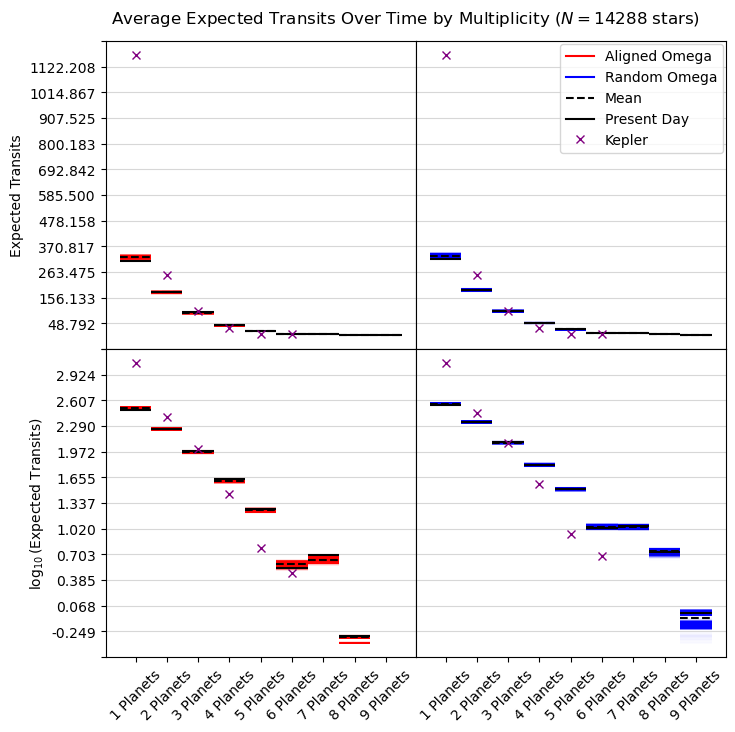

In [10]:
plot_data()